# Análise Métricas - Financial Application

In [106]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data Processing

In [107]:
def getPath(testSize, approach):
  return '/content/gdrive/MyDrive/financial-application-data/' + str(testSize) + '/v' + str(approach) + '-results.json'

def processFile(path):
  file = open(path, 'r')

  getMetrics = []
  postMetrics = []

  for line in file:
    data = json.loads(line)
    if data['type'] == 'Point' and data['metric'] == 'http_req_duration':
      if data['data']['tags']['method'] == 'GET':
        getMetrics.append(data['data']['value'])
      elif data['data']['tags']['method'] == 'POST' and data['data']['tags']['url'].endswith('/transactions'):
        postMetrics.append(data['data']['value'])

  getMetrics.pop(-1)

  return getMetrics, postMetrics

def getAverageAndDifference(metrics):
  Z = 2.58 # 99%

  average = np.average(metrics)
  std = np.std(metrics)

  difference = Z * (std / np.sqrt(len(metrics)))

  return average, difference

def getInterval(average, difference):
  return [round(average - difference, 3), round(average, 3), round(average + difference, 3)]

In [108]:
# Scenario 1 (100 transactions)
v1s1GetMetrics, v1s1PostMetrics = processFile(getPath(100, 1))
v1s1GetAverage, v1s1GetDifference = getAverageAndDifference(v1s1GetMetrics)
v1s1PostAverage, v1s1PostDifference = getAverageAndDifference(v1s1PostMetrics)

v2s1GetMetrics, v2s1PostMetrics = processFile(getPath(100, 2))
v2s1GetAverage, v2s1GetDifference = getAverageAndDifference(v2s1GetMetrics)
v2s1PostAverage, v2s1PostDifference = getAverageAndDifference(v2s1PostMetrics)

v3s1GetMetrics, v3s1PostMetrics = processFile(getPath(100, 3))
v3s1GetAverage, v3s1GetDifference = getAverageAndDifference(v3s1GetMetrics)
v3s1PostAverage, v3s1PostDifference = getAverageAndDifference(v3s1PostMetrics)

# Scenario 2 (1000 transactions)
v1s2GetMetrics, v1s2PostMetrics = processFile(getPath(1000, 1))
v1s2GetAverage, v1s2GetDifference = getAverageAndDifference(v1s2GetMetrics)
v1s2PostAverage, v1s2PostDifference = getAverageAndDifference(v1s2PostMetrics)

v2s2GetMetrics, v2s2PostMetrics = processFile(getPath(1000, 2))
v2s2GetAverage, v2s2GetDifference = getAverageAndDifference(v2s2GetMetrics)
v2s2PostAverage, v2s2PostDifference = getAverageAndDifference(v2s2PostMetrics)

v3s2GetMetrics, v3s2PostMetrics = processFile(getPath(1000, 3))
v3s2GetAverage, v3s2GetDifference = getAverageAndDifference(v3s2GetMetrics)
v3s2PostAverage, v3s2PostDifference = getAverageAndDifference(v3s2PostMetrics)

# Scenario 3 (10000 transactions)
v1s3GetMetrics, v1s3PostMetrics = processFile(getPath(10000, 1))
v1s3GetAverage, v1s3GetDifference = getAverageAndDifference(v1s3GetMetrics)
v1s3PostAverage, v1s3PostDifference = getAverageAndDifference(v1s3PostMetrics)

v2s3GetMetrics, v2s3PostMetrics = processFile(getPath(10000, 2))
v2s3GetAverage, v2s3GetDifference = getAverageAndDifference(v2s3GetMetrics)
v2s3PostAverage, v2s3PostDifference = getAverageAndDifference(v2s3PostMetrics)

v3s3GetMetrics, v3s3PostMetrics = processFile(getPath(10000, 3))
v3s3GetAverage, v3s3GetDifference = getAverageAndDifference(v3s3GetMetrics)
v3s3PostAverage, v3s3PostDifference = getAverageAndDifference(v3s3PostMetrics)

## Graphics Generation

In [109]:
def getTestSizeByScenario(scenario):
  testSize = {
      '1': '100',
      '2': '1000',
      '3': '10000'
  }

  return testSize[str(scenario)]

def getDescriptionByRequestType(requestType):
  description = {
    'Get': 'Consulta de Saldo',
    'Post': 'Cadastro de Transações'
  }

  return description[requestType]

def getColorByApproach(approach):
  color = {
      '1': 'blue',
      '2': 'red',
      '3': 'green'
  }

  return color[str(approach)]

def generateConfidenceIntervalTable():
  fig, ax = plt.subplots()

  plt.title('Confidence Interval Table')

  fig.patch.set_visible(False)
  ax.axis('off')
  ax.axis('tight')

  columns = ['Approach', 'Test Size', 'Operation', 'Interval Min', 'Average', 'Interval Max']
  lines = [
      ['A1', '100', 'Read'] + getInterval(v1s1GetAverage, v1s1GetDifference),
      ['A2', '100', 'Read'] + getInterval(v2s1GetAverage, v2s1GetDifference),
      ['A3', '100', 'Read'] + getInterval(v3s1GetAverage, v3s1GetDifference),
      ['A1', '1000', 'Read'] + getInterval(v1s2GetAverage, v1s2GetDifference),
      ['A2', '1000', 'Read'] + getInterval(v2s2GetAverage, v2s2GetDifference),
      ['A3', '1000', 'Read'] + getInterval(v3s2GetAverage, v3s2GetDifference),
      ['A1', '10000', 'Read'] + getInterval(v1s3GetAverage, v1s3GetDifference),
      ['A2', '10000', 'Read'] + getInterval(v2s3GetAverage, v2s3GetDifference),
      ['A3', '10000', 'Read'] + getInterval(v3s3GetAverage, v3s3GetDifference),
      ['A1', '100', 'Write'] + getInterval(v1s1PostAverage, v1s1PostDifference),
      ['A2', '100', 'Write'] + getInterval(v2s1PostAverage, v2s1PostDifference),
      ['A3', '100', 'Write'] + getInterval(v3s1PostAverage, v3s1PostDifference),
      ['A1', '1000', 'Write'] + getInterval(v1s2PostAverage, v1s2PostDifference),
      ['A2', '1000', 'Write'] + getInterval(v2s2PostAverage, v2s2PostDifference),
      ['A3', '1000', 'Write'] + getInterval(v3s2PostAverage, v3s2PostDifference),
      ['A1', '10000', 'Write'] + getInterval(v1s3PostAverage, v1s3PostDifference),
      ['A2', '10000', 'Write'] + getInterval(v2s3PostAverage, v2s3PostDifference),
      ['A3', '10000', 'Write'] + getInterval(v3s3PostAverage, v3s3PostDifference),
  ]

  df = pd.DataFrame(lines, columns=columns)

  ax.table(cellText=df.values, colLabels=df.columns, loc='center')

  fig.tight_layout()

  plt.show()

def generateGraphicForAllApproaches(scenario):
  plt.title('Tempo Médio das Requisições em Teste com ' + getTestSizeByScenario(scenario) + ' Transações')

  barWidth = 0.3
  r1 = np.arange(2)
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]

  plt.bar(r1, [eval('v1s' + scenario + 'GetAverage'), eval('v1s' + scenario + 'PostAverage')], width = barWidth, color = getColorByApproach('1'), yerr=[eval('v1s' + scenario + 'GetDifference'), eval('v1s' + scenario + 'PostDifference')], capsize=7, label='A1')
  plt.bar(r2, [eval('v2s' + scenario + 'GetAverage'), eval('v2s' + scenario + 'PostAverage')], width = barWidth, color = getColorByApproach('2'), yerr=[eval('v2s' + scenario + 'GetDifference'), eval('v2s' + scenario + 'PostDifference')], capsize=7, label='A2')
  plt.bar(r3, [eval('v3s' + scenario + 'GetAverage'), eval('v3s' + scenario + 'PostAverage')], width = barWidth, color = getColorByApproach('3'), yerr=[eval('v3s' + scenario + 'GetDifference'), eval('v3s' + scenario + 'PostDifference')], capsize=7, label='A3')

  plt.xticks([r + barWidth for r in range(2)], ['GET /balance', 'POST /transactions'])

  plt.ylabel("Tempo de Requisição (ms)")
  plt.legend()
  plt.show()

def generateGraphicForAllScenarios(requestType):
  plt.title('Tempo Médio das Requisições de ' + getDescriptionByRequestType(requestType))

  barWidth = 0.3
  r1 = np.arange(3)
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]

  plt.bar(r1, [eval('v1s1' + requestType + 'Average'), eval('v1s2' + requestType + 'Average'), eval('v1s3' + requestType + 'Average')], width = barWidth, color = getColorByApproach('1'), yerr=[eval('v1s1' + requestType + 'Difference'), eval('v1s2' + requestType + 'Difference'), eval('v1s3' + requestType + 'Difference')], capsize=7, label='A1')
  plt.bar(r2, [eval('v2s1' + requestType + 'Average'), eval('v2s2' + requestType + 'Average'), eval('v2s3' + requestType + 'Average')], width = barWidth, color = getColorByApproach('2'), yerr=[eval('v2s1' + requestType + 'Difference'), eval('v2s2' + requestType + 'Difference'), eval('v2s3' + requestType + 'Difference')], capsize=7, label='A2')
  plt.bar(r3, [eval('v3s1' + requestType + 'Average'), eval('v3s2' + requestType + 'Average'), eval('v3s3' + requestType + 'Average')], width = barWidth, color = getColorByApproach('3'), yerr=[eval('v3s1' + requestType + 'Difference'), eval('v3s2' + requestType + 'Difference'), eval('v3s3' + requestType + 'Difference')], capsize=7, label='A3')

  plt.xticks([r + barWidth for r in range(3)], ['100', '1000', '10000'])

  plt.ylabel("Tempo de Requisição (ms)")
  plt.legend()
  plt.show()

def generateGraphicWithAllRequestTimes(approaches, requestType, scenario):
  plt.title("Requisições de " + getDescriptionByRequestType(requestType) + " para " + getTestSizeByScenario(scenario) + " Transações")

  plt.xlabel("Número de Transações")
  plt.ylabel("Tempo de requisição (ms)")

  for approach in approaches:
    plt.plot(eval("v" + approach + 's' + scenario + requestType + "Metrics"), color=getColorByApproach(approach), label="A" + approach)

  plt.legend()
  plt.show()

## Results

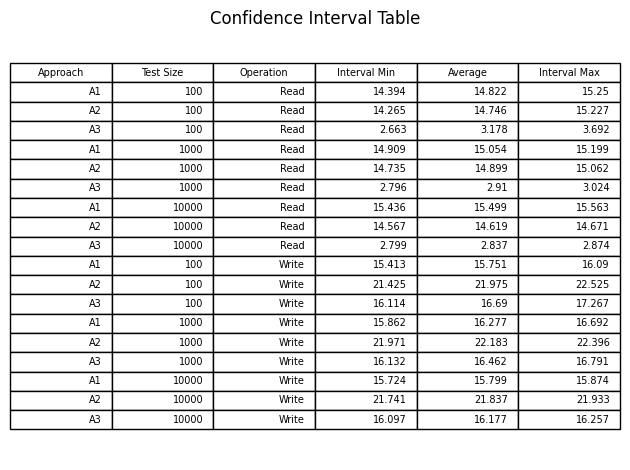

In [110]:
generateConfidenceIntervalTable()

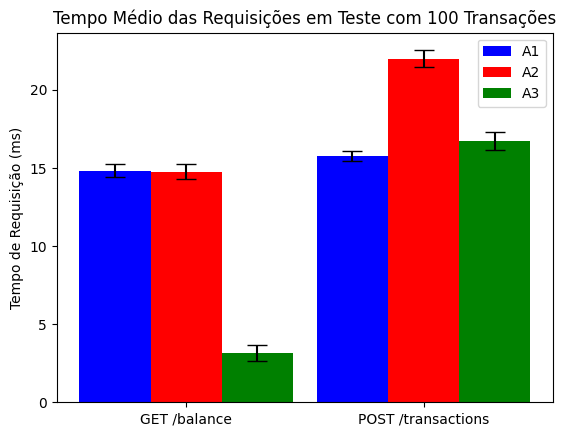

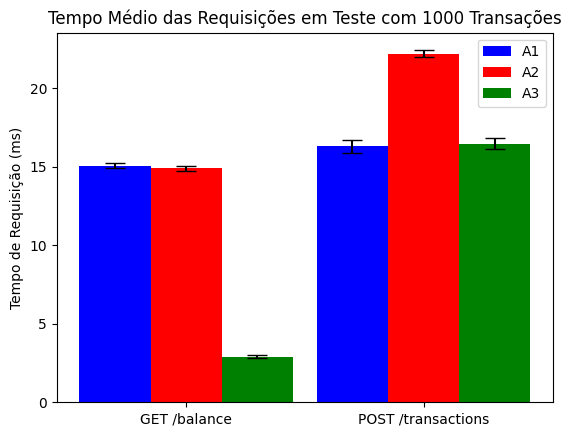

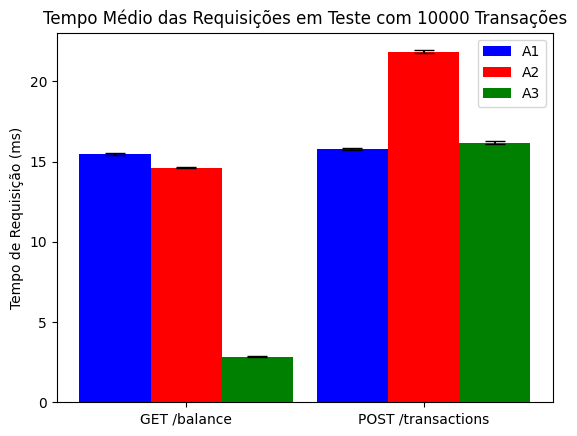

In [111]:
generateGraphicForAllApproaches('1')
print()
generateGraphicForAllApproaches('2')
print()
generateGraphicForAllApproaches('3')

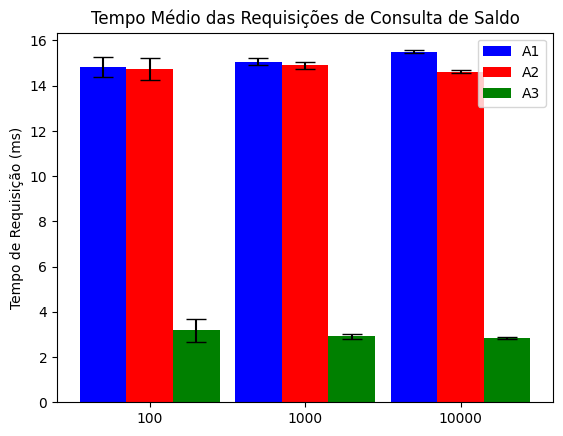

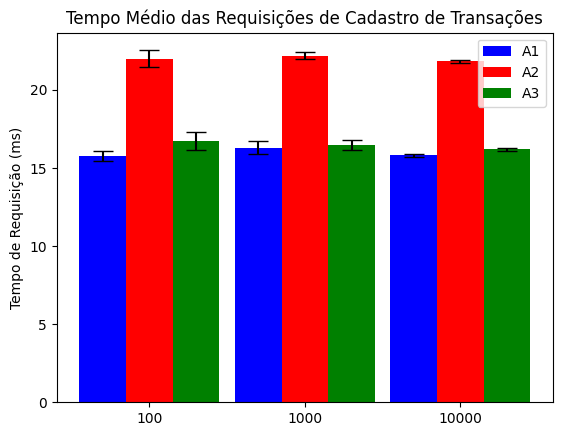

In [112]:
generateGraphicForAllScenarios('Get')
print()
generateGraphicForAllScenarios('Post')

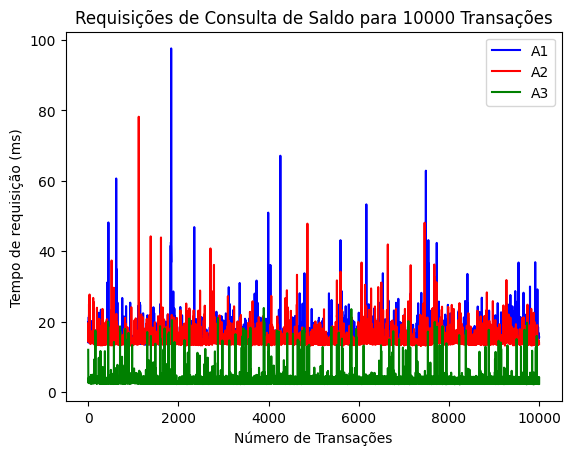

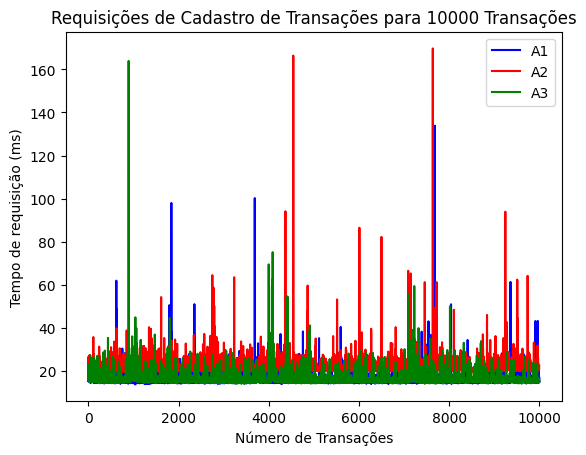

In [113]:
generateGraphicWithAllRequestTimes(['1', '2', '3'], 'Get', '3')
print()
generateGraphicWithAllRequestTimes(['1', '2', '3'], 'Post', '3')